# <div style="text-align: center">Защита персональных данных клиентов. </div>

Страховой компании «Хоть потоп» необходимо предсказывать кол-во страховых выплат клиентам. Данные клиентов, используемые для предсказаний, нужно защитить. Необходимо разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Необходимо обосновать корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

- __Описание данных:__
  - Источник данных: https://code.s3.yandex.net/datasets/insurance.csv.
  - Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.
  - Целевой признак: количество страховых выплат клиенту за последние 5 лет.
  
  
- __Цели и план работы__:
  - __Цели работы:__
    - Разработать метод преобразования данных, который защитит персональную информацию клиентов и не повлияет на результаты прогнозирования страховых выплат.
    - Проверить метод на модели линейной регрессии.<br><br>
    
  - __План работы:__
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-библиотек." data-toc-modified-id="Загрузка-библиотек.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка библиотек.</a></span></li><li><span><a href="#Установка-параметров-проекта." data-toc-modified-id="Установка-параметров-проекта.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Установка параметров проекта.</a></span></li><li><span><a href="#Загрузка-и-изучение-данных." data-toc-modified-id="Загрузка-и-изучение-данных.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Загрузка и изучение данных.</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных." data-toc-modified-id="Загрузка-данных.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Загрузка данных.</a></span></li><li><span><a href="#Изучение-данных." data-toc-modified-id="Изучение-данных.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Изучение данных.</a></span><ul class="toc-item"><li><span><a href="#Изучение-данных.-Вывод." data-toc-modified-id="Изучение-данных.-Вывод.-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Изучение данных. Вывод.</a></span></li><li><span><a href="#Удаление-дубликатов." data-toc-modified-id="Удаление-дубликатов.-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Удаление дубликатов.</a></span></li></ul></li></ul></li><li><span><a href="#Умножение-матриц." data-toc-modified-id="Умножение-матриц.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Умножение матриц.</a></span><ul class="toc-item"><li><span><a href="#Умножение-матриц.-Вывод." data-toc-modified-id="Умножение-матриц.-Вывод.-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Умножение матриц. Вывод.</a></span></li></ul></li><li><span><a href="#Алгоритм-преобразования." data-toc-modified-id="Алгоритм-преобразования.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Алгоритм преобразования.</a></span><ul class="toc-item"><li><span><a href="#Алгоритм." data-toc-modified-id="Алгоритм.-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Алгоритм.</a></span></li><li><span><a href="#Проверка-работы-алгоритма." data-toc-modified-id="Проверка-работы-алгоритма.-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Проверка работы алгоритма.</a></span></li><li><span><a href="#Обоснование." data-toc-modified-id="Обоснование.-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Обоснование.</a></span></li></ul></li><li><span><a href="#Проверка-алгоритма-на-линейной-регрессии." data-toc-modified-id="Проверка-алгоритма-на-линейной-регрессии.-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Проверка алгоритма на линейной регрессии.</a></span><ul class="toc-item"><li><span><a href="#Проверка-$R^2$-c-преобразованием-предикторов." data-toc-modified-id="Проверка-$R^2$-c-преобразованием-предикторов.-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Проверка $R^2$ c преобразованием предикторов.</a></span></li><li><span><a href="#Проверка-$R^2$-без-преобразования-предикторов." data-toc-modified-id="Проверка-$R^2$-без-преобразования-предикторов.-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Проверка $R^2$ без преобразования предикторов.</a></span></li><li><span><a href="#Сравнение-$R^2$." data-toc-modified-id="Сравнение-$R^2$.-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Сравнение $R^2$.</a></span></li><li><span><a href="#Проверка-алгоритма-на-линейной-регрессии.-Вывод." data-toc-modified-id="Проверка-алгоритма-на-линейной-регрессии.-Вывод.-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Проверка алгоритма на линейной регрессии. Вывод.</a></span></li></ul></li><li><span><a href="#Общий-вывод." data-toc-modified-id="Общий-вывод.-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Общий вывод.</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

## Загрузка библиотек.

In [1]:
# Работа с таблицами.
import pandas as pd
# Визуализация.
import matplotlib.pyplot as plt
# Рассчёты.
import numpy as np
# Работа с моделями.
from sklearn.model_selection import  train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# Кастомизация вывода.
from IPython.display import display_html 

## Установка параметров проекта.

In [2]:
# Установим стиль отображения заголовков таблиц.
styles = [
    dict(selector='caption',
         props=[('text-align', 'center'),
                ('font-size', '130%'),
                ('font-weight', 'bold'),
                ('white-space', 'pre-wrap')]),
    dict(selector="th",
         props=[('max-width', '250px')])
    ]

# Установим начальное значение генератора псевдослучайных чисел.
seed = 42
np.random.seed(seed)

## Загрузка и изучение данных.

### Загрузка данных.

In [3]:
try:
    df = pd.read_csv('/datasets/insurance.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/insurance.csv')

### Изучение данных.
Выведем информацию и первые 20 строк датафрейма.

- Информация о датайфрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


None

  - Кол-во явных дубликатов в датафрейме: 153

  - Уникальные значения целевого признака: [0 1 2 3 5 4]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

- Распределение признаков:


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
85%,1.000000,40.000000,50100.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


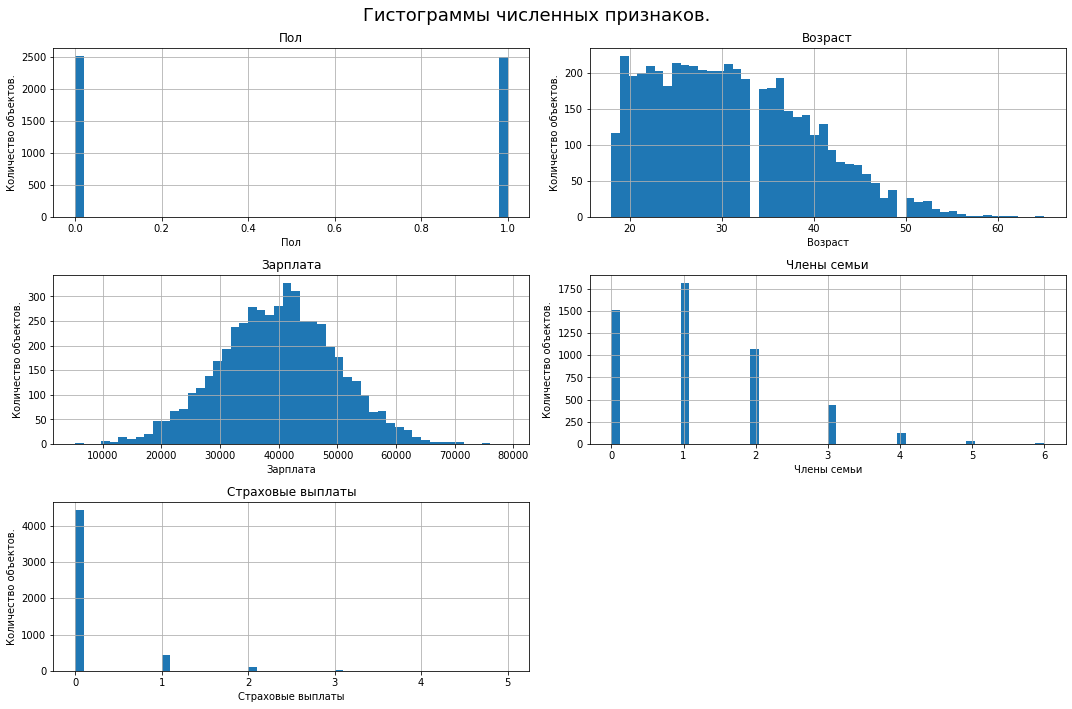


- Первые 20 строк датафрейма:


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


In [4]:
# Выведем информацию о данных.
print('\033[1m- Информация о датайфрейме:\033[0m')
display(df.info())

# Выведем кол-во явных дубликатов и уникальные значения 
# целевого признака.
print('  - Кол-во явных дубликатов в датафрейме:',
     df.duplicated().sum())
print('\n  - Уникальные значения целевого признака:',
     df['Страховые выплаты'].unique())
print('~' * 70)

# Выведем распределения признаков.
print('\n\033[1m- Распределение признаков:\033[0m')
display(df.describe([.25, .5, .75, .85]))

# Выведем гистограммы численных признаков.
axs = df.hist(figsize=(15, 10), bins=50)
plt.suptitle('Гистограммы численных признаков.', fontsize=18)
for ax, col in zip(axs.flatten(), df.columns):
#     ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel('Количество объектов.')
plt.tight_layout()
plt.show();

# Выведем первые 20 строк датафрейма.
print('\n\033[1m- Первые 20 строк датафрейма:\033[0m')
display(df.head(20))

#### Изучение данных. Вывод.
- Данные содержат 5000 объектов и 5 признаков, в т.ч. целевой.<br>
- **Признаки**:
  - `Пол` - бинарный;
  - `Возраст` - количественный, дискретный;
  - `Зарплата` - количественный, непрерывный;
  - `Члены семьи` количественный, дискретный;

- **Целевой признак:**
  - `Страховые выплаты` - количественный, дискретный.<br>
  
- **Дубликаты:**<br>
Обнаружено 153 дублированных объекта. Дубликаты необходимо удалить.
- **Пропуски:**<br> 
Не обнаружены.
- **Тип данных:**<br> 
Типы данных приведены, кроме признаков `Возраст` и `Зарплата`, приведение которых к целочисленному формату ощутимо не повлияет на используемую память.

#### Удаление дубликатов.
Удалим дубликаты и проверим результат.

In [5]:
# Удалим дубликаты и проверим результат.
df.drop_duplicates(inplace=True)
print('Кол-во явных дубликатов в датафрейме после удаления:',
     df.duplicated().sum())

Кол-во явных дубликатов в датафрейме после удаления: 0


## Умножение матриц.

- Задачу защиты данных клиентов решим с помощью матричных преобразований: умножением предикторов на обратимую матрицу.
- Для этого предварительно в общем виде установим изменится ли качество линейной регрессии при умножении предикторов на обратимую матрицу (алгоритм можно обучить заново).<br>
&nbsp;&nbsp;a. Изменится. Приведём примеры матриц.<br>
&nbsp;&nbsp;b. Не изменится. Укажем, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.
<br><br>
- Обозначения:

  - $X$ — матрица признаков (нулевой столбец состоит из единиц)

  - $y$ — вектор целевого признака

  - $P$ — матрица, на которую умножаются признаки

  - $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

  - $A$ и $B$ — произвольные квадратные невырожденные матрицы

  - $E$ — единичная матрица<br><br>

- Предсказания:

$$
a = Xw
$$

- Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

- Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

- Введём матрицу $P$ в формулы вычисления векторов оптимальных весов и предсказаний линейной регрессии.<br>Для этого домножим все матрицы признаков $X$ в формулах на $P$ - обратимую, а следовательно квадратную и согласованную матрицу, на которую, в соответствие с поставленной задачей, умножается матрица признаков для кодирования.

$$
a_1 = X P w_1
$$
$$
w_1 = ((XP)^T (XP))^{-1} (XP)^T y
$$

- Подставим преобразованную формулу вычисленния вектора весов $w_1$ в формулу предсказаний $a_1$.

$$
a_1 = X P ((XP)^T (XP))^{-1} (XP)^T y
$$

- Воспользуемся свойством транспонированных матриц: $(AB)^T = B^T A^T$.<br>
Преообразуем выражения в скобках:

$$
a_1 = X P ((XP)^T(XP))^{-1}(XP)^T y = 
$$
$$
= X P (P^T X^T X P)^{-1} P^T X^T y
$$
  <br>
- Т.к. матрицы $(X^T X)$ и $P$ обратимы и квадратны воспользуемся свойством обратных матриц $(ABC)^{-1} = C^{-1} B^{-1} A^{-1}$.<br>
Вынесем матрицы $P$ и $P^T$ за скобки:

$$
a_1 = X P (P^T X^T X P)^{-1} P^T X^T y =
$$
$$
= X P P^{-1} (X^T X)^{-1} P^{-T} P^T X^T y
$$
- Cделаем соответствующее преобразование с матрицей $P$, воспользовавшись следующими свойствами матриц:
  - матрица, умноженная на обратную, даёт единичную: $AA^{-1}=E$;
  - матрица, умноженная на единичную, даёт себя: $AE = A$.

$$
a_1 = X P P^{-1} (X^T X)^{-1} P^{-T} P^T X^T y
$$
$$
= X E (X^T X)^{-1} E X^T y
$$

- В результате преобразований получим:
$$
a_1 = X (X^T X)^{-1} X^T y = a
$$

### Умножение матриц. Вывод.
**Ответ:**<br>
Качество линейной регрессии при умножении признаков на обратимую матрицу не изменится.

**Обоснование:**<br>
Т.к. после преобразваний формулы предсказаний сводятся к одинаковому результату, т.е. $a = a_1$, можем сделать вывод, что умножение матрицы признаков на обратимую матрицу не изменит качество регрессии.

## Алгоритм преобразования.

### Алгоритм.     
Для защиты данных клиентов перед подачей данных в модель линейной регрессии, умножим предикторы на псевдослучайную обратимую матрицу. Для этого создадим класс преобразователя `sklearn`, в котором зададим функцию, которая
  - примет на вход предикторы;
  - создаст псевдослучайную обратимую матрицу с размерами равными кол-ву предикторов в данных;
  - проверит вырожденность созданной матрицы, сравнив её детерминант с `0`, и проитерирует и перезапишет генератор случайных чисел при необходимости;
  - умножит матрицу признаков на созданную псевдослучайную обратимую матрицу;
  - выведет на выход преобразованные предикторы.
  
_Примечание:_ Класс преобразователя был создан для тренировки. Можно было ограничиться функциональным преобразователем - `FunctionTransformer`.

In [6]:
class MatrixMulitplier(BaseEstimator, TransformerMixin):
    '''
    Returns the dot product of predictors dataframe `X` and 
    random invertible matrix of size (`X.shape[1]` x `X.shape[1]`).
    '''
    def __init__(self, seed=None):
        self.seed = seed

    def fit(self, X, y=None):
        return self
        
    # Функция умножения предикторов на псевдослучайную обратимую матрицу.
    def transform(self, X):
        if self.seed is not None:
            np.random.seed(self.seed)

        # Создадим обратимую матрицу.
        n_features = X.shape[1]
        rnd_inv_matrix = np.random.rand(n_features, n_features)

        # Проверим созданную матрицу на вырожденность.
        while np.linalg.det(rnd_inv_matrix) == 0:
            self.seed += 1
            np.random.seed(self.seed)
            rnd_inv_matrix = np.random.rand(n_features, n_features)
        # Умножим предикторы на созданную обратимую матрицу и вернём рез-тат.
        return X @ rnd_inv_matrix  

### Проверка работы алгоритма.
- Разделим данные на предикторы и целевой признак.
- Создадим экземпляр класса преобразователя и проверим рез-тат работы функции преобразования, выведя первые 5 строк оригинального и преобразованного датафреймов предикторов.

In [7]:
# Разделим данные на предикторы и целевой признак.
X = df.drop('Страховые выплаты', axis=1)
y = df['Страховые выплаты']

# Создадим экземпляр класса преобразователя.
matrix_encoder = MatrixMulitplier()

# Проверим рез-тат работы функции преобразования, выведя первые 
# 5 строк датафреймов.
X_encoded = matrix_encoder.fit_transform(X)
X_encoded.columns = X.columns

display_html(
    X.head()
    .style
    .set_table_attributes("style='display:inline'")
    .set_caption('Оригинальные предикторы.')
    .set_table_styles(styles)
    ._repr_html_()+
    '\xa0'*5+
    X_encoded.head()
    .style
    .set_table_attributes("style='display:inline'")
    .set_caption('Преобразованные предикторы.')
    .set_table_styles(styles)
    ._repr_html_(), 
    raw=True
)

,Пол,Возраст,Зарплата,Члены семьи
0,1,41.000000,49600.000000,1
1,0,46.000000,38000.000000,1
2,0,29.000000,21000.000000,0
3,0,21.000000,41700.000000,2
4,1,28.000000,26100.000000,0
,Пол,Возраст,Зарплата,Члены семьи
0,29822.908329,35127.958687,1024.286164,48143.823952
1,22850.379746,26914.146043,785.064454,36896.601889
2,12627.939787,14874.047975,433.958805,20393.226004
3,25071.437266,29530.327057,859.956818,40463.797343


### Обоснование.
- Кодирование предикторов умножением на псевдослучайную обратимую матрицу эффективно, т.к.:
  - преобразованные предикторы никак внешне не напоминают оригинальные и не имеют смысла для отдельно взятого объекта / клиента (e.g.: Возраст клиента - `29822`);
  - преобразование предикторов невозможно обратить, чтобы получить оригинальные данные.

## Проверка алгоритма на линейной регрессии.
- Разделим данные на обучающую и тестовую выборки в соотношении 70% / 30%.
- Проверим качество линейной регрессии с преобразованием предикторов.
- Проверим качество линейной регрессии без преобразования предикторов.
- Сравним результаты.

In [8]:
# Разделим данные на обучающую и тестовую выборки.
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.3, 
                                                    random_state=seed)

### Проверка $R^2$ c преобразованием предикторов.
- Создадим пайплайн, включающий шаг преобразования предикторов с помощью класса преобразователя ([5.1](#Алгоритм.)).
- Обучим модель на обучающей выборке.
- Вычислим коэффициент детерминации $𝑅^2$ на тестовой выборке.

In [10]:
# Создадим пайплайн для линейной регрессии.
lr_matrix_pipe = Pipeline(steps=[
    ('matrix_multiplier', MatrixMulitplier()),
    ('lr', LinearRegression())
])

lr_matrix_pipe.fit(X_train, y_train)
r2_encoded = r2_score(y_test, lr_matrix_pipe.predict(X_test))
print('Коэффициент детерминации R^2 для линейной регрессии с '+
      f'преобразованием предикторов: {r2_encoded}.')

Коэффициент детерминации R^2 для линейной регрессии с преобразованием предикторов: 0.4324084156275294.


### Проверка $R^2$ без преобразования предикторов.
- Обучим модель на обучающей выборке.
- Вычислим коэффициент детерминации $𝑅^2$ на тестовой выборке.

In [10]:
# Обучим модель и вычислим коэффициент детерминации.
lr = LinearRegression()
lr.fit(X_train, y_train)
r2 = r2_score(y_test, lr.predict(X_test))
print('Коэффициент детерминации R^2 для линейной регрессии без '+
      f'преобразования предикторов: {r2}.')

Коэффициент детерминации R^2 для линейной регрессии без преобразования предикторов: 0.4324084156282242.


### Сравнение $R^2$.

In [11]:
print(f'Разница значений коэффициента детерминации: {r2_encoded - r2}.')

Разница значений коэффициента детерминации: -6.94777568810423e-13.


### Проверка алгоритма на линейной регрессии. Вывод.
- Учитывая особенности хранения дробных чисел в Python, можно сказать, что коэффициент детерминации $R^2$ для линейной регрессии с преобразованием предикторов и без одинаков, что подверждает отсутствие потери качества линейной регрессии при умножении матрицы признаков на обратимую матрицу.

## Общий вывод.
- Была доказана эффективность алгоритма защиты данных с помощью умножение независымых признаков на обратимую матрицу.
- Было доказано, теоритически и практически, что эффективность линейной регрессии при такой трансформации предикторов не снижается.